# Gaussian Processes: https://blog.dominodatalab.com/fitting-gaussian-process-models-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel
df = pd.read_csv(r'C19 newCases.csv')

        id       date  new_cases_malaysia
0      1.0  24-1-2020                 0.0
1      2.0  25-1-2020                 4.0
2      3.0  26-1-2020                 0.0
3      4.0  27-1-2020                 0.0
4      5.0  28-1-2020                 3.0
..     ...        ...                 ...
214  215.0  25-8-2020                11.0
215  216.0  26-8-2020                 6.0
216  217.0  27-8-2020                 5.0
217  218.0  28-8-2020                10.0
218  219.0  29-8-2020                11.0

[219 rows x 3 columns]


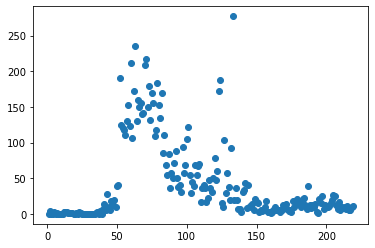

In [2]:
plt.scatter(df['id'], df['new_cases_malaysia'])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.dropna()
print(df)

In [3]:
x = df['id']
y = df['new_cases_malaysia']

X = x.values.reshape(-1, 1)
X.shape

(219, 1)

In [4]:
kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)
gp = gaussian_process.GaussianProcessRegressor(kernel = kernel)
gp.fit(X, y)


GaussianProcessRegressor(kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1))

In [5]:
gp.kernel_

42.4**2 + Matern(length_scale=5.63e+04, nu=1.5) + WhiteKernel(noise_level=3.26e+03)

In [8]:
x_pred = np.linspace(0, 220).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

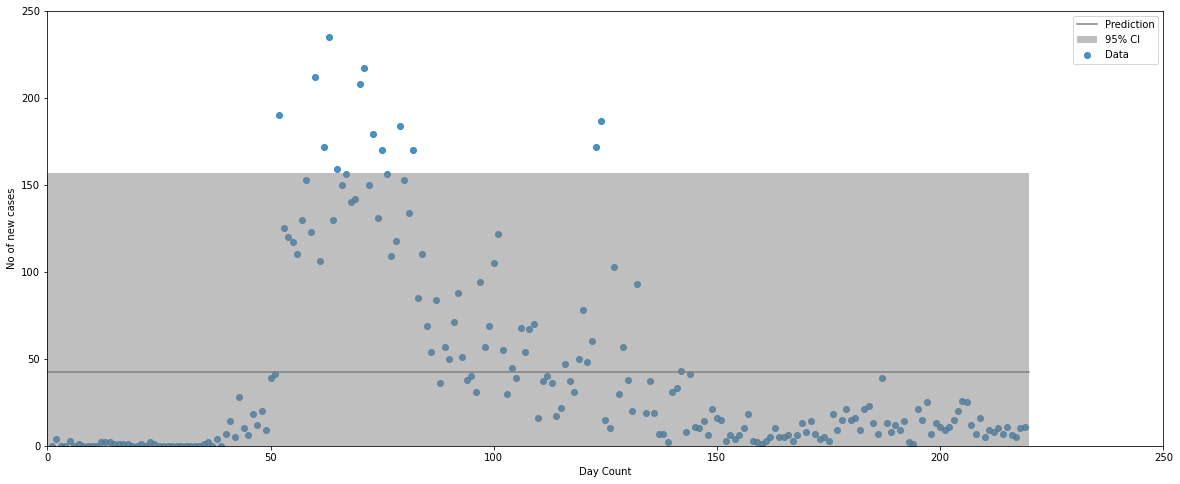

In [9]:
plt.figure(figsize=(20,8))
sns.regplot(x, y, fit_reg=False, label='Data')
plt.plot(x_pred, y_pred, color='grey', label='Prediction')
plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([y_pred - 2*sigma,
                        (y_pred + 2*sigma)[::-1]]),
         alpha=.5, fc='grey', ec='None', label='95% CI')
plt.xlabel('Day Count')
plt.ylabel('No of new cases')
plt.xlim(0, 250)
plt.ylim(0, 250)
plt.legend(loc='upper right');